# Data Exploration for Historians


## A very gentle and practical introduction

In this lecture we continue exploring dataframes, but slowly dive into more analytical topics. We first show how to manipulate dataframes and try to understand and describe the properties of the data we're working with. Later on we move on the more statistical topics: hypothesis testing and regression.

This course doesn't provide a formal and rigorous introduction, but similarly to the Python part, we hope that by informally discussing and presenting more technical topics, historians are able to intuitively grasp how data analysis may be helpful for their research. We provde links to other handbooks and courses below.

## Age, Gender and Disability in London

For our first statistical exploration we use a small sample of (anonymised) census data from London. This records for each person in London their place, age, gender and disability. 

Gender, place are called variables. We first study them individually and later turn to analysing and interpreting their relationship.

# Opening and manipulating dataframes with Pandas

As in the previous notebook we first load all the tools and packages that we need for our analysis. The first line instructs the  environment to show all plots in the notebook. Line two and three import different libraries. In both cases we use an abbreviation to reference to these libraries later on (you'll notice 'pd' returning everywhere. This is just to save you time typing. In the last line we intruct Python to use `seaborn` for plotting (set it as default) this is just to make things look prettier! 

In [92]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

Below we load the data. The syntax should be familiar from the previous notebook. Basically we use the function `read_csv` from the Pandas `pd` library to load a file on the location `'data/icem/EW01_london_sample.csv'`. The last argument `index_col` indicates the want the first colums (index 0) to serve as row index for our dataframe.

In [93]:
df = pd.read_csv('data/icem/EW01_london_sample.csv',index_col=0)

In [94]:
df = df.sample(frac=.5, random_state=0).reset_index()

Now we can print the first rows with `.head()`

In [95]:
df.head()

index     RegDist             SubDist Sex  Age  DisCode1  DisCode2  \
0  3413059     Lambeth             Norwood   M   24         0         0   
1  3356255     Lambeth             Brixton   M   33         0         0   
2  1283420   Islington      Upper Holloway   F   57         0         0   
3    22772  Paddington  St Mary Paddington   M   11         0         0   
4  1680336     Hackney       North Hackney   F   34         0         0   

  Industry  HISCO  
0        .  99999  
1        .  80320  
2        .  99999  
3        .      .  
4        .  37020

Pandas provides a few methods for interpreting and understanding the data we are working with. Firstly we can print the `.shape` attribute (not a function, remember?) which express the basic structure of the dataframe.

In [96]:
df.shape

(2210474, 9)

Dataframes are structured data and consist of rows and columns. Row are usually observations or records, in this case individuals living in London. The columns are attributes or features of these records. In this case they capture specific attributes of people, the district where they live, their sex, age and disability.

To understand the size of the dataframe, `.shape` returns a tuple with the first element indicating the number of rows and the second the number of columns.

In data analysis dataframes are the most common object to work with. As we demonstrate below, pandas will provide you with many tools to understand and made sense of the this information. A useful methods that gives a general description of the content is `.info()`. Applying this method to `df` we get:

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2210474 entries, 0 to 2210473
Data columns (total 9 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   index     int64 
 1   RegDist   object
 2   SubDist   object
 3   Sex       object
 4   Age       int64 
 5   DisCode1  int64 
 6   DisCode2  int64 
 7   Industry  object
 8   HISCO     object
dtypes: int64(4), object(5)
memory usage: 151.8+ MB


We observe the same numbers for rows and columns. What's interesting here is the description of the columns.

- `Column`: the column name
- `Non-Null Count`: often dataframes will contain missing data. This happens, for example when the attribute for a specific records is missing or unobserved. For example, we lack the sex of a specific individual. This columns tells us how complete the column is. Luckily in this we don't have missing data. For each colums the number of non-null counts equals the nubmber of rows `4421`. Even though missing data is an important topic, it is outside the scope of this tutorial.
- `Dtype`: tells us the data type of each column or variable. This will play an important role in the remainder of this course, as the type of the variable often determines the desing of our analysis and experiments. This dataframes contains two data types 'int64' and 'object'. `int64` are integers or counts. `Age` record number of years since birth as a number i.e. `34` etc. `object` is a vaguer category often indicates textual content.  **[complete description]**.

Pandas tries to determine the dtype of each columns when opening the file, but can get it wrong (from our perspective). For example `DisCode1` 

Sometimes we change variables for convenience. e.g. gender often converted to a categorical variable.

Techniques we will apply arer related to the data type of variable.

## Variable types

In general, we distinguish between following variable
    - numerical: 
        - continuous: probabilities or rations (e.g. np.float64
        - discrete: counts, number of words, age in year (np.int64)
    - categorical:
        - binary: sex np.object or np.int8 
        - ordinal: can be ordered but the step sizes are not fixed or easy to interpret. For example the likert scale, ratings. (np.object or np.int16)
        - nominal: distinct categories that can not be ordered. e.g. Industry. or Disability.
        

## Inspection of colums: plotting data distributions.

We can further inspect variables, especially the categorical one by using the `value_counts()` method to a column. This counts how often each value occurs and ranks the seperate categories by the frequency of their occurence. For example we can easily pull up the number of records by their sex and plot the results.

We firstly observe that the `Sex` variable contains three categories `F`, `M` and `U`, the latter meaning `Unknown`.

In [98]:
df['Sex'].value_counts()

F    1151473
M     977986
U      81015
Name: Sex, dtype: int64

Notice that we can do the same using a slightly different syntax. In this case we don't use squary bracks but the column name follows as an attribute of the dataframe. This won't work if the column name contain space, special characters of names that are also used to define methods or attributes. 

In [99]:
df.Sex.value_counts()

F    1151473
M     977986
U      81015
Name: Sex, dtype: int64

By applying `.plot()` we easily visualize the distribution of the categories in each variable. For example, the line of code below plots occurence of each label in the `Sex` columns. The argument `kind` specifies the type of plot. In this case used `barplot` in which each categorie is represented by one bar.

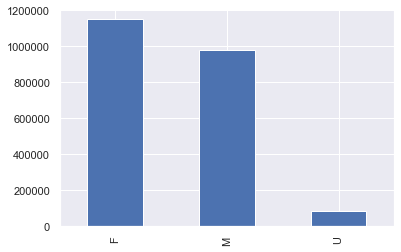

In [100]:
df['Sex'].value_counts().plot(kind='bar')

For sure, we could also made a lineplot (changing `'bar'` to `'line'`). However, here we already observe how the data type of the variables influences our analysis. The lineplot is clearly not the most appropriate, not only lesss readable, is suggest a continuity that isn't there.

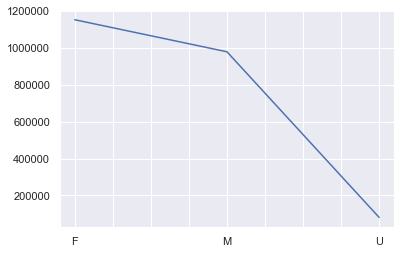

In [101]:
df['Sex'].value_counts().plot(kind='line')

To plot the distibution of the numerical variables we need to follow a slightly different strategy. A common approach is to plot the histogram. This basically tells us how often each element in a numeric variable occurs (there is more to it, but we come to that in a second).

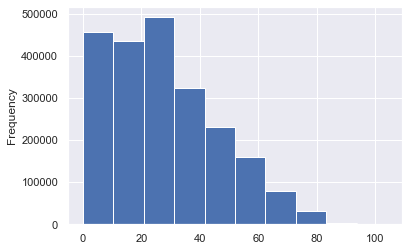

In [102]:
df['Age'].plot(kind='hist')

The figure above gives an indication of the distribution of age of 19th century Londoners. If we have a closer look at the graph, you'll notice that age are grouped in seperate 'bins', i.e. each bar cover approximate ten years in age difference. Depending on your interest you can make the plot more or less granular. 

How to read this plot? Basically it tells us data we around 450000 observation from people aged between 0 and 10 etc. The largest group are between ca. 20 and 30 years old.

We can, for example show the same distribution dividing `Age` into 100 bins.

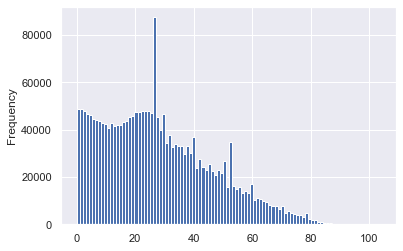

In [103]:
df['Age'].plot(kind='hist',bins=100)

Now, that's a stange peak there in the around. Often it is more helpful to determine the binsize ourselves. We can do this by passing a list with determine the start and end of each bin. Here we try to plot the distribution of age with year as the basic unit.

In [104]:
df['Age'].plot(kind='hist',bins=range(0,101,1))

Of course, looking at the distribution only gets you so far. We need to describe it more accurately. Here is wher measure of location and dispersion can help us.

# Location and Dispersion

While the previous section, helps us to understand the structure and content of our data to some extent, it all remains fairly superficial. It gives a good overview, but doesn't provide much of a grip. To dig deeper and start describing the data we often have to rely on different strategies to summarize information. Looking at all the data points (for example all the years in the age column), we'd like to know what age is typical for certain groups. To better understand and summarize distibutions, we discusss some 'statistics' to help us 


[informal definition of statistic]

Each of these statistics help us to estimate where values are located or what is the most typical value.

### range

Determining the range of values is often a good start, we first extract the most extreme values, to know where all other elements in a variable are located. In pandas we can apply the `.min()` and `.max()` methods to a columsn with numerical values and subtract them to obtain the range of ages of poeple in London

In [105]:
max_age = df.Age.max()

In [106]:
min_age = df.Age.min()

In [107]:
range_age = max_age - min_age

In [108]:
print('Age maximum', max_age)
print('Age minimum', min_age)
print("Age range", range_age )

Age maximum 104
Age minimum 0
Age range 104


The oldest person in London 1901 (in our sample at least) was 104 years, the youngest was obviously just born. Anyway, this tells us the all ages fall between these limits.

## mean

The most common statistic to summarize a numeric variable is the mean. For example below I records the number of cats I observed each day of the week. I collected these counts and saved them in the variable 'cats_observed`

In [137]:
cats_observed = [1,4,5,4,6,4,2]

The mean then could be interpreted as number cats of I expect to observed daily. This statistic is obtained by summing up all the cats I observed by the number of days

In [138]:


sum_obs = np.sum(cats_observed)
len_obs = len(cats_observed)
print('total cats observed',sum_obs)
print('number of days ',len_obs)
print('mean',round(sum_obs /len_obs,2))


total cats observed 26
number of days  7
mean 3.71


In pandas we can easily compute the mean for a variable by applying the `.mean()` method.

In [139]:
df.Age.mean()

27.78761749742363

The question remains: is the mean as good estimate of location, are most of values close to the mean? In the 

In [140]:

obs =[1,4,5,4,6,4,222]
sum_obs = np.sum(obs)
len_obs = len(obs)
round(sum_obs /len_obs,2)


35.14

In [141]:
from scipy.stats import trim_mean
trim_mean(df.Age,0.1)

26.321554190841336

is the mean a meaningful valuable measure of location?
trimmed mean a "good compromise"

robust measures
median
middle of sorted list of values
 only one value
    vs mean which uses all values

In [142]:
obs = [1,4,5,4,6,4,2]
obs.sort()
print(obs)
obs[2]

[1, 2, 4, 4, 4, 5, 6]


4

In [143]:
obs = [1,4,5,4,6,4,222]
obs.sort()
obs[2]

4

In [144]:
df.Age.median()

25.0

The median is often called a more robust measure of location, i.e. it is not sensitive the particular outliers, which is a benefit. On the other hand, is attempts to the measure location based on just one number, i.e. the number in the middle of a sorted variable. The mean on the other hand is based on all values in a variables, and therefore, at least in smaller samples, more sensitive to outliers than the median.

A good option is looking at quantiles, which takes into accout the middle values but also other relevant, for example 25% and 75% of the data.

In [183]:
df.Age.quantile([.25,.5,.75])

0.25    13.0
0.50    25.0
0.75    40.0
Name: Age, dtype: float64

More values in the range of 0.5 (almost equally) but bigger steps later on 15 but 25 are between 40 and 105.
**rewrite** transition to estimating spread.

# Estimating spread

While the previous statistics aimed at capturing the most 'typical' values in a series, the ones we discuss below try to compute the spread around the expected values. The helps us

A mean is meaningless unless we assess the extent to which values deviate from the mean, can we expect them to generally appear close to the mean or not. Looking the dispersion or variability within on variable is critical, and we discuss this topic in more detail later.

The measures of spread calculate the deviation between our estimate of location (mean of median) and all other obeserved values. 

One of the most common measures of spread is the standard deviation.

To compute the standard deviations we first need to calculat the variance, which bacically tells us how distant is each observation is located from the mean. 

If we return to example with cats observed by day, we first compute the mean.

In [145]:
cats_observed = [1,4,5,4,6,4,2]
mean = np.mean(cats_observed)
mean

3.7142857142857144

Then we calculate the distance of each value to the mean and take the power of two of this value. This ensure that all values of positive. We are interested here in the distance and not in the direction.

In [147]:
np.power(2,2)

4

In [148]:
np.power(4,2)

16

In [149]:
distances = []
for v in cats_observed:
    distances.append(np.power(v - mean,2))
distances

[7.367346938775511,
 0.08163265306122441,
 1.6530612244897955,
 0.08163265306122441,
 5.224489795918367,
 0.08163265306122441,
 2.9387755102040822]

Then we sum all the distance and divide by the number of observation minus one. The reason for this isn't important to discuss here, it is related to the idea of degrees of freedom. However, a diversion would obscure more than explain. Also, we working with many obseration, it basically doesn't matter if you divide by `n` of `n - 1`. 

In [158]:
sum_of_distances = np.sum(distances)

In [159]:
variance = sum_of_distances / (len(distances) - 1)
variance

2.9047619047619047

Then the standard deviation is the square root of this value.

In [160]:
np.sqrt(variance)

1.7043362064926932

Luckily, there exists, of course, and method in Pandas for compute the standard deviation (or variance if you like). We first convert the list to instance of type `pd.Series` and then apply the `.std()` method.

In [162]:
co = pd.Series(cats_observed)
print('variance',co.var())
print('standard deviation',co.std())

variance 2.9047619047619047
standard deviation 1.7043362064926932


Of course we can now also compute the standard deviation of age in London population.

In [163]:
df.Age.std()

18.52626106582737

It is of course hard to pin down a meaning on this number. Is the standard deviation high? When does it matter?

The value of computing these statistics becomes more apparent when we start comparing groups and periods with each other. For example if we compare two means, the standard deviation helps is interpreting if the difference between means points to substantial divergence. We will come back to this later. 

Another common metric is the median absolute deviation from the median or simple MAD. This is similar to the standard deviation but we simple replace the mean with median.

In [169]:
cats_observed.sort()
print(cats_observed)
median = cats_observed[int(len(cats_observed)/2)]
print(median)

[1, 2, 4, 4, 4, 5, 6]
4


In [184]:
distances = []
for v in cats_observed:
    distances.append(np.abs(v - median))
distances

[3, 2, 0, 0, 0, 1, 2]

In [191]:
distances.sort()
distances

[0, 0, 0, 1, 2, 2, 3]

In [190]:
distances[3]

1

In [188]:
from scipy.stats import median_abs_deviation
median_abs_deviation(cats_observed)

1.0

In [192]:
median_abs_deviation(df.Age)

13.0

# Grouping and comparing data

The measures we discussed in the preceding section, are especially useful when it comes to comparing subgroups in our data. As Luke Blaxill explained in the first series of lectures, digital history often involves making meaningfull and intelligent comparisons for understanding historical patterns. 


This means being question driven and clear about the expectations. Of course, often the data will point in the opposite directions of our expectations but that's OK. It is through conversation with empericial materials—asking questions, analysing answers—that we gradually build new insights. 

Below we will have a closer look at the distribution of age in late Victorian London. From describing the data, we will attempt more and more understand and explain the variability in the data. 

## Sex and Age Differences
### Studying the relation between numerical and categorical variables

Are women, on average, older then men? If we plot the distribution of age with a histograms, you observe a slightly camel-like shape. Two peaks, one in the category of very young, between 0 and 10, and later, the distribution seems to peak around 25 year. Which is a kind-off strange pattern.

A first question we ask is relating age to gender and how do difference influences the shape of the overall distribution. 

In [234]:
df.Age.plot(kind='hist',bins=range(100))

Pandas, fortunately, provides are very useful method to compare subgroups in the dataframe: `.groupby`. Below we use groupby to compare the average `Age` by `Sex`.

In [235]:
df.groupby('Sex')['Age'].mean()

Sex
F    28.363064
M    27.381952
U    24.505808
Name: Age, dtype: float64

This syntax may come across as confusing at first sight, so let's have bit closer look at what's happening here. Groupby returns the mean age for each label in the `Sex`. It does so in three steps, which will replicate here to show you the process, but you can forget the syntax later. 

First we split the dataframe by label or key. These are unique values in the `Sex` variable.

In [236]:
df.Sex.unique()

array(['M', 'F', 'U'], dtype=object)

In [237]:
df_f = df[df.Sex=='F']
df_m = df[df.Sex=='M']
df_u = df[df.Sex=='U']

This creates three seperate dataframes one for each lable 'F','M' and 'U'.

In [238]:
df_f.shape,df_m.shape

((1151473, 9), (977986, 9))

Next we compute the mean for the "Age" column for each seperate dataframe.

In [239]:
mean_f = df_f['Age'].mean()
mean_m = df_m['Age'].mean()
mean_u = df_u['Age'].mean()

print('mean age "F"',mean_f)
print('mean age "M"',mean_m)
print('mean age "U"',mean_u)


mean age "F" 28.363063658461815
mean age "M" 27.381952297885654
mean age "U" 24.50580756650003


Lastly we combine these values in a `Series` object.

In [240]:
mean_age_by_gender = pd.Series([mean_f,mean_m,mean_u],index=['F','M','U'],name='Age')
mean_age_by_gender

F    28.363064
M    27.381952
U    24.505808
Name: Age, dtype: float64

As you notice, the output of these steps is exactly the same as the one produced by applying `groupby`, it only required way more lines of code. It is often helpful to translate code in humane language: grouby the 'Age' variable by labels in the 'Sex' column and compute the mean for each category.

In [241]:
df.groupby('Sex')['Age'].mean()

Sex
F    28.363064
M    27.381952
U    24.505808
Name: Age, dtype: float64

![groubpy](https://jakevdp.github.io/PythonDataScienceHandbook/figures/03.08-split-apply-combine.png)

Jake VanderPlas make a very apt visualisation of the process.

Of course, with groupby we can easily obtain other measures, for example compute the median for each 'Sex' category.

In [242]:
df.groupby('Sex')['Age'].median()

Sex
F    26.0
M    25.0
U    20.0
Name: Age, dtype: float64

While the median is generlly lower, the difference remain rather stable: whether we compute the mean or median, women in London seem generally one year older then men.

You can even compute multiple measures at once, for example the mean **and** the standard deviation. Below we apply `.agg()` to the `Age` columns. `.agg()` here takes a list of function that (`np.mean`, `np.std`] which are in turned applied to each subsection of the dataframe. The resulst is a 3x2 table, with the rows corresponding to the labels in `Sex` and the columns the different measures (`np.mean` and `np.std`)

In [243]:
df.groupby('Sex')['Age'].agg([np.mean, np.std])

mean        std
Sex                      
F    28.363064  18.717479
M    27.381952  18.283767
U    24.505808  18.229115

`.groupby` can also be used for plotting! Instead of return a number it will create a subplot (in this case histogram for each sex) and combine these into one figure. 

To make the figure more readable we added a few arguments
- `legend=True`: instructs Pandas to plot the label coresponding with each color in the plot
- `alpha=.5`: regulates transparency of the colours, which is always a good idea when combining histograms, otherwise some groups may become invisible.

Sex
F    AxesSubplot(0.125,0.125;0.775x0.755)
M    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

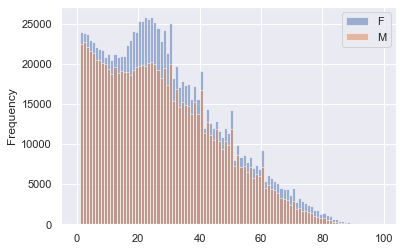

In [244]:
df[df.Sex.isin(['F','M'])].groupby('Sex')['Age'].plot(kind='hist',
                                                      legend=True,
                                                      bins=range(100),
                                                     alpha=.5)

Plotting the age distribution by gender helps us understanding the general camel-like pattern a bit better. In both categories, the histograms shows a concentration in the age category 20-30, but the trend is more pronounced among women than men.

But why at the organe bar systermically lower than the blue ones? Remember that the histogram

In [218]:
df[df.Sex.isin(['F','M'])].groupby('Sex')['Age'].plot(kind='density',
                                                      legend=True,
                                                      alpha=.5)

Sex
F    AxesSubplot(0.125,0.125;0.775x0.755)
M    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

Other ways of plotting an numerical variable and categorical one.

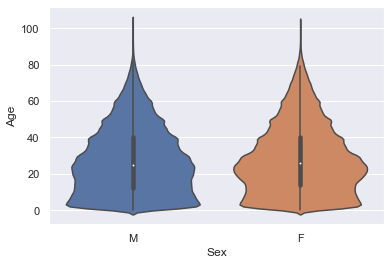

In [232]:
sns.violinplot(x='Sex',y='Age',data= df[df.Sex.isin(['M','F'])])

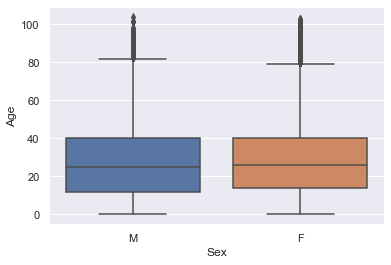

In [233]:
sns.boxplot(x='Sex',y='Age', data = df[df.Sex.isin(['M','F'])])

Visually, it looks like the the age for men and women in London didn't differ substantially. Later on we have a closer look if there exists a statistically 'significant' difference. 

But first, let's inspect the data in a it more detail. `.groubpy()` allows us to refine the comparison, for example, by inspecting age differences across gender and place. As the districts in London varied by their wealth and work patterns, we may expect the age to differ as well. 

We can simply add place 'RegDist' as a new level for grouping our the data. The code below, does the same as the `.groupby()` operation we used earlier, the only difference is that we split multiple time: first we split the data by place, and then, within each place we further split by gender and then compute the mean for Age, after which all the results are neatly grouped again.

In [247]:
by_reg_gen = df.groupby(['RegDist','Sex'])['Age'].mean()
by_reg_gen

RegDist        Sex
Bethnal Green  F      25.995132
               M      25.625989
               U      20.605239
Camberwell     F      28.057542
               M      26.728287
                        ...    
Whitechapel    M      26.020602
               U      24.163015
Woolwich       F      26.763641
               M      26.318538
               U      21.361296
Name: Age, Length: 90, dtype: float64

Working with output of this operation requires a bit more thought. The `.groupby` arranges data slightly differently depending if you group on one or more columns. This becomes apparent when printing the `type()` of the `.index` attribute.

In [253]:
type(df.groupby('Sex')['Age'].median().index)

pandas.core.indexes.base.Index

In [254]:
type(by_reg_gen.index)

pandas.core.indexes.multi.MultiIndex

`by_reg_gen` is `MultiIndex` which is an important and useful different to be familiar with when working with dataframes.

In [257]:
by_reg_gen['Bethnal Green']

Sex
F    25.995132
M    25.625989
U    20.605239
Name: Age, dtype: float64

In [258]:
by_reg_gen['Bethnal Green':'Chelsea']

RegDist        Sex
Bethnal Green  F      25.995132
               M      25.625989
               U      20.605239
Camberwell     F      28.057542
               M      26.728287
               U      23.243439
Chelsea        F      31.484838
               M      30.559585
               U      28.898795
Name: Age, dtype: float64

In [259]:
by_reg_gen[:,'F']

RegDist
Bethnal Green               25.995132
Camberwell                  28.057542
Chelsea                     31.484838
Fulham                      27.902206
Greenwich                   27.543568
Hackney                     28.683805
Hampstead                   29.608508
Holborn                     27.489112
Islington                   29.009590
Kensington                  30.928682
Lambeth                     28.961847
Lewisham                    28.833723
London City                 31.196930
Marylebone                  30.524406
Mile End Old Town           26.393631
Paddington                  30.453149
Pancras                     29.104622
Poplar                      26.547547
Shoreditch                  27.030984
Southwark                   27.093812
St George Hanover Square    30.782991
St George In The East       24.498067
St Giles                    30.632567
St Olave Southwark          26.609010
Stepney                     25.798016
Strand                      30.005301
Wand

In [260]:
f_m_diff = by_reg_gen[:,'F'] - by_reg_gen[:,'M']
f_m_diff

RegDist
Bethnal Green               0.369142
Camberwell                  1.329254
Chelsea                     0.925252
Fulham                      1.255188
Greenwich                   0.966524
Hackney                     1.259611
Hampstead                   0.308467
Holborn                     0.435827
Islington                   1.407257
Kensington                  1.553670
Lambeth                     1.305470
Lewisham                    1.397764
London City                 2.782941
Marylebone                  0.955480
Mile End Old Town           0.621116
Paddington                  1.646787
Pancras                     0.996318
Poplar                     -0.066276
Shoreditch                  0.165169
Southwark                   0.033052
St George Hanover Square    1.162627
St George In The East      -0.150752
St Giles                   -0.465601
St Olave Southwark          0.223425
Stepney                    -0.386682
Strand                     -1.032796
Wandsworth                  0.

## Hypothesis testing

At this stage, we can compute study and compare distribution of variables. But a question than immediately appears: are the differences we observe "significant", and what do we mean with "significance". In this section we have a closer look at hypothesis testing, but from a data driven perspective.

Traditional statistical methods, such as the Student's t-test arose in times of limited computing power and relied often on theorems and assumptions about the distributions and their properties. Explaining this requires many detour and implies a steep learning for the statistically unitiated. 

In this lecture therefore focus in more data-driven and hopefully intuitive procedures for signficance testing. We will rely on what is called the *permutation precudure*. The question we first address regards the relation between Sex and Age in Whitechapel and Westminster. We observed in the previous section that both districts deviate from the general pattern, namely a slightly older female population.

In [321]:
df_whitechapel = df[df.RegDist=='Stepney']
df_westminster = df[df.RegDist=='Westminster']
df_whitechapel.shape, df_westminster.shape

((28240, 9), (16139, 9))

In [322]:
df_whitechapel.groupby('Sex')['Age'].agg([np.mean,np.std])

mean        std
Sex                      
F    25.798016  18.354419
M    26.184698  17.988289
U    23.004013  16.887794

In [323]:
df_westminster.groupby('Sex')['Age'].agg([np.mean,np.std])

mean        std
Sex                      
F    28.754780  17.281681
M    29.325056  17.313493
U    27.968318  16.109174

In the case of Whitechapel, the difference between the mean is a 1.3 years. But is this a 'significant' difference. In the statistical language of hypothesis testing, if this difference a random artefact of the data, is the product of random chance? The latter will be our Null Hypothesis, namely that random chance explains the observed differences between the mean. The Alternate Hypothesis, is the "counterpoint" the Null Hypothesis, namely that the differences are not the result of random chance, there is a true difference. 

The procedure we will following is trying "prove" that the Alternative Hypothesis is True by rejecting the Null Hypothesis: we hope to show that if the Null Hypethesis is true, the observed 

In other words: the results derived from the conflict with the assumption that Null Hypothesis is. In this case will accept the Alternative Hypothesis.


Let's convert this to the case study at hand. 

What do we mean with random? Essentially we like to prove that differences in age between the sexes is related to 

Any subsection 

Directionality of the alternative hypothesis
different
greater than
smaller than


Central limit theorem


mean converges to a normal distribution

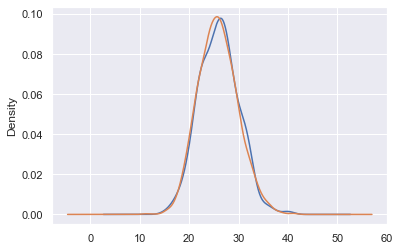

In [324]:
mean_sampled = []
for _ in range(500):
    sample = df_whitechapel['Age'].sample(20)
    mean_sampled.append(sample.mean())
pd.Series(mean_sampled).plot(kind='density')
mean_sampled = []
for _ in range(5000):
    sample = df_whitechapel['Age'].sample(20)
    mean_sampled.append(sample.mean())
pd.Series(mean_sampled).plot(kind='density')

In [325]:
df_wh_F = df_whitechapel[df_whitechapel.Sex=='F']
df_wh_M = df_whitechapel[df_whitechapel.Sex=='M']
df_wh_P = df_whitechapel[df_whitechapel.Sex.isin(['F','M'])]


In [326]:
df_wh_F.shape,df_wh_M.shape

((13610, 9), (13384, 9))

In [327]:
len(a_idx),len(b_idx), len(all_idx)

(7740, 7168, 14908)

In [336]:
permutations = []
num_F = df_wh_F.shape[0]
all_idx = set(df_wh_P.index)
for _ in range(5000):
    a_idx = set(df_wh_P.sample(num_F).index)
    b_idx = all_idx - a_idx
    permutations.append(df_wh_P.loc[a_idx]['Age'].mean() - df_wh_P.loc[b_idx]['Age'].mean())

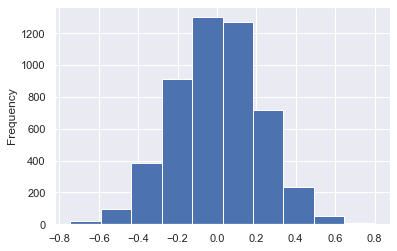

In [337]:
pd.Series(permutations).plot(kind='hist')

In [338]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(permutations, bins=11, rwidth=0.9)
ax.axvline(x = df_wh_F['Age'].mean() - df_wh_M['Age'].mean(), color='black', lw=2)
#ax.text(50, 190, 'Observed\ndifference')
ax.set_xlabel('Mean age differences')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

In [341]:
np.mean(np.array(permutations) <= df_wh_F['Age'].mean() - df_wh_M['Age'].mean())

0.0382

In [342]:
from scipy.stats import ttest_ind
ttest_ind(df_wh_F['Age'],df_wh_M['Age'], alternative='less')

Ttest_indResult(statistic=-1.747818753447198, pvalue=0.04025339347792516)

## Gender and Disability
### Relations between categorical variables

In [343]:
df['Disability'] = df['DisCode1'] > 0 

In [351]:
p = df.groupby('Sex')['Disability'].agg([np.sum, len])

In [352]:
p['no_disab']  = p['len'] - p['sum']

sum      len  no_disab
Sex                         
F    4772  1151473   1146701
M    4412   977986    973574
U    1692    81015     79323

In [353]:
p.T

Sex             F       M      U
sum          4772    4412   1692
len       1151473  977986  81015
no_disab  1146701  973574  79323

In [357]:
import random
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[idx_B].mean() - x.loc[idx_A].mean()


In [ ]:
obs_pct_diff = 100 * ((4772 / 1151473) - (4412 / 977986))
print(f'Observed difference: {obs_pct_diff:.4f}%')
conversion = [0] * (1146701+973574)
conversion.extend([1] * (4772+4412))
conversion = pd.Series(conversion)
perm_diffs = [100 * perm_fun(conversion, 1151473, 977986) for _ in range(100)]
fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x=obs_pct_diff, color='black', lw=2)
#ax.text(0.06, 200, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Conversion rate (percent)')
ax.set_ylabel('Frequency')

Observed difference: -0.0367%


In [366]:
from scipy import stats
survivors = np.array([[4772, 1146701], [4412, 973574]])
chi2, p_value, df, _ = stats.chi2_contingency(survivors)
print(f'p-value : {p_value*2 / 2:.8f}')
chi2

p-value : 0.00004848


16.50645419109596

# Linear Regression

In [360]:
rv = pd.read_csv('./data/icem/rateable_value_1922.csv',index_col=0)
rv.head()

borough  rateable.value.percapita
0      Battersea                       6.1
1     Bermondsey                       8.5
2  Bethnal Green                       4.9
3     Camberwell                       5.2
4        Chelsea                      14.7

In [95]:
rv['rateable.value.percapita']

0      6.1
1      8.5
2      4.9
3      5.2
4     14.7
5      5.8
6     14.2
7      6.1
8      7.6
9      5.7
10     7.0
11    13.3
12    32.0
13     5.7
14    14.4
15     6.3
16     6.4
17    10.7
18     5.7
19    23.2
20     8.7
21     8.2
22     6.7
23     6.5
24     6.5
25     6.9
26    57.2
27     6.6
Name: rateable.value.percapita, dtype: float64

In [96]:
#!open ./data/rateable_value_1922.csv

In [97]:
set(df['RegDist'].unique()).intersection(set(rv.borough.unique()))

{'Bethnal Green',
 'Camberwell',
 'Chelsea',
 'Fulham',
 'Greenwich',
 'Hackney',
 'Hampstead',
 'Holborn',
 'Islington',
 'Kensington',
 'Lambeth',
 'Lewisham',
 'Marylebone',
 'Paddington',
 'Pancras',
 'Poplar',
 'Shoreditch',
 'Southwark',
 'Stepney',
 'Wandsworth',
 'Westminster',
 'Woolwich'}

In [98]:
set(df['RegDist'].unique()) - (set(rv.borough.unique()))

{'London City',
 'Mile End Old Town',
 'St George Hanover Square',
 'St George In The East',
 'St Giles',
 'St Olave Southwark',
 'Strand',
 'Whitechapel'}

In [99]:
age_by_dist = df.groupby(['RegDist'])['Age'].mean()
age_by_dist

RegDist
Bethnal Green               25.602174
Camberwell                  27.306419
Chelsea                     30.947606
Fulham                      27.224348
Greenwich                   26.843336
Hackney                     27.940652
Hampstead                   29.311958
Holborn                     27.125319
Islington                   28.195570
Kensington                  30.159826
Lambeth                     28.227379
Lewisham                    28.065542
London City                 29.507261
Marylebone                  30.064641
Mile End Old Town           26.065593
Paddington                  29.635145
Pancras                     28.445942
Poplar                      26.424664
Shoreditch                  26.724759
Southwark                   26.903755
St George Hanover Square    30.259325
St George In The East       24.457116
St Giles                    30.622503
St Olave Southwark          26.233488
Stepney                     25.856036
Strand                      30.680311
Wand

In [100]:
merged = rv.merge(age_by_dist,left_on='borough',right_index=True)
merged

borough  rateable.value.percapita        Age
2   Bethnal Green                       4.9  25.602174
3      Camberwell                       5.2  27.306419
4         Chelsea                      14.7  30.947606
7          Fulham                       6.1  27.224348
8       Greenwich                       7.6  26.843336
9         Hackney                       5.7  27.940652
11      Hampstead                      13.3  29.311958
12        Holborn                      32.0  27.125319
13      Islington                       5.7  28.195570
14     Kensington                      14.4  30.159826
15        Lambeth                       6.3  28.227379
16       Lewisham                       6.4  28.065542
17     Paddington                      10.7  29.635145
18         Poplar                       5.7  26.424664
19     Marylebone                      23.2  30.064641
20        Pancras                       8.7  28.445942
21     Shoreditch                       8.2  26.724759
22      Southwark                       6.7  26.903755
23        Stepney                       6.5  25.856036
25     Wandsworth                       6.9  27.455796
26    Westminster                      57.2  29.005486
27       Woolwich                       6.6  26.432886

In [124]:
# Correlation and Regression

In [102]:
merged['rateable.value.percapita'].corr(merged['Age'])

0.3643189447496354

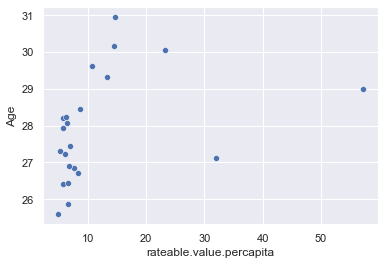

In [103]:
sns.scatterplot(x='rateable.value.percapita',y='Age',data=merged)

In [148]:
merged['rvc_log'] = np.log(merged['rateable.value.percapita'])

In [158]:
wo_outliers = merged[~merged.borough.isin(['Westminster',"Holborn"])]
wo_outliers['rvc_log'].corr(wo_outliers['Age'])

0.8058884133839759

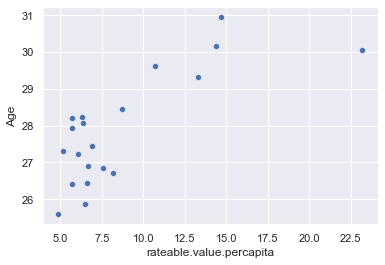

In [150]:
sns.scatterplot(x='rateable.value.percapita',y='Age',data=wo_outliers)

In [151]:
sns.regplot(x="rateable.value.percapita", y="Age", data=merged,
                 scatter_kws={"s": 80},
                 order=1,ci=False)

In [152]:
sns.regplot(x="rvc_log", y="Age", data=merged,
                 scatter_kws={"s": 80},
                 order=1,ci=False)

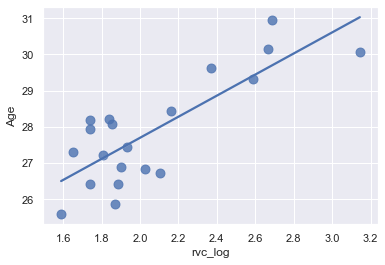

In [153]:
sns.regplot(x="rvc_log", y="Age", data=wo_outliers,
                 scatter_kws={"s": 80},
                 order=1,ci=False)

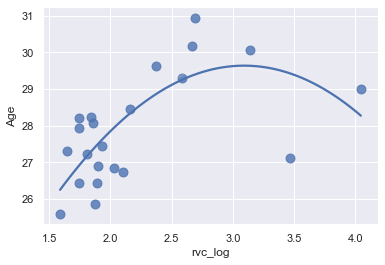

In [154]:
sns.regplot(x="rvc_log", y="Age", data=merged,
                 scatter_kws={"s": 80},
                 order=2, ci=False)

In [126]:
import numpy as np
np.polyfit(x=wo_outliers['rateable.value.percapita'], y=wo_outliers['Age'], deg=2)

array([-1.89764975e-02,  7.42595924e-01,  2.32476986e+01])

In [157]:
sns.regplot(x="rvc_log", y="Age", data=merged,
                 scatter_kws={"s": 80},
                 order=8, ci=False)

In [110]:
# 

array([-1.89764975e-02,  7.42595924e-01,  2.32476986e+01])

In [140]:
import statsmodels.api as sm
model = sm.GLM(np.array(X['Disability']), pd.DataFrame(X[['Age','Sex_M']]).assign(const=1), family=sm.families.Binomial())
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:              4258417
Model:                            GLM   Df Residuals:                  4258414
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2282e+05
Date:                Wed, 29 Dec 2021   Deviance:                   2.4564e+05
Time:                        15:13:32   Pearson chi2:                 4.44e+06
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age            0.0327      0.000     94.931      0.000       0.032       0.033
Sex_M          0.1868      0.014     13.150      0.000       0.159       0.215
const         -6.5586      0.017   -376.186      0.000      -6.593      -6.524
==============================================================================
"""

In [6]:
f = df[df.Sex=='F']
m = df[df.Sex=='M']

In [7]:
from scipy.stats import ttest_ind

ttest_ind(f.Age,m.Age)

Ttest_indResult(statistic=54.35825722548718, pvalue=0.0)

In [18]:
fs, ms = [],[]

for i in range(5000):
    fs.append(f.Age.sample(n=10).mean()- m.Age.sample(n=10).mean())

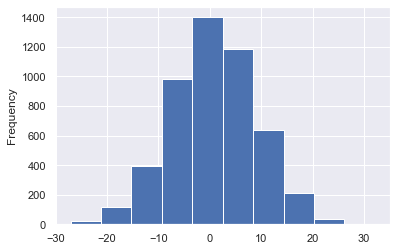

In [21]:
pd.Series(fs).plot(kind='hist')
#pd.Series(ms).plot(kind='density')


In [30]:
f_a = f.Age
m_a = m.Age
a_a = df.Age

In [31]:
a_a

0          63
1          54
2          30
3          28
4          26
           ..
4532212    36
4532213    13
4532214    11
4532215     4
4532216     2
Name: Age, Length: 4420947, dtype: int64

In [43]:
import random
from tqdm import tqdm_notebook

In [27]:
set(random.sample(range(10), 5))

{1, 2, 3, 4, 7}

In [44]:
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.iloc[list(idx_B)].mean() - x.iloc[list(idx_A)].mean()

In [46]:
perm_diffs = [perm_fun(a_a,len(f_a),len(m_a)) for _ in tqdm_notebook(range(100))]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


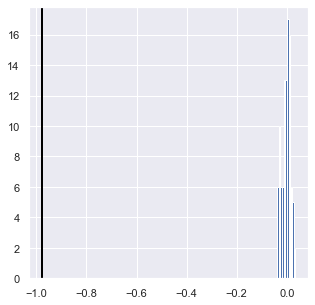

In [49]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x = np.mean(m_a) - np.mean(f_a), color='black', lw=2)

In [50]:
np.mean(m_a) - np.mean(f_a)

-0.9785210757724947

In [51]:
perm_diffs

[0.010989588040445142,
 0.0016160517145600295,
 -0.01779292706331148,
 -0.007435041769888073,
 -0.018126716866905923,
 -0.0028745085609998,
 -0.003933558362771095,
 0.008061126222500548,
 0.02652168807967925,
 -0.026166039558589205,
 0.004185193064046189,
 0.012143195860232936,
 0.024135989285145598,
 -0.004900886887071465,
 -0.03660808148804762,
 -0.03114073688638541,
 -0.016113576663354223,
 0.005413501718066982,
 0.006352462836961337,
 -0.035946175361939225,
 -0.019303964191202283,
 -0.006897006647378134,
 -0.008900691049127829,
 0.009912572215245774,
 -0.029288345313460695,
 0.007140131127030713,
 -0.004264511425823514,
 0.011474670672864562,
 -0.012163888250842803,
 0.005016358042400526,
 -0.020009367005595635,
 -0.006528230377117694,
 0.010942309031435116,
 -0.006620897234775214,
 0.004906670741505081,
 0.019947069087056235,
 0.027784983200366042,
 -0.012595072812995767,
 -0.03039940202514657,
 0.01991397378075277,
 -0.019319093474081228,
 0.014994120103402508,
 0.013356375231374

In [52]:
df.head()

RegDist             SubDist Sex  Age  DisCode1  DisCode2 Industry  HISCO
0  Paddington  St Mary Paddington   M   63         0         0        .  95410
1  Paddington  St Mary Paddington   F   54         0         0        .      .
2  Paddington  St Mary Paddington   M   30         0         0        .  79620
3  Paddington  St Mary Paddington   M   28         0         0        .  79120
4  Paddington  St Mary Paddington   M   26         0         0        .  96900

In [70]:
df['DisAb'] = df['DisCode1'].apply(lambda x: 1 if x > 0 else 0)

In [71]:
df.groupby('Sex')['DisAb'].count()

Sex
F    2302507
M    1955910
U     162530
Name: DisAb, dtype: int64

In [73]:
df.groupby('Sex')['DisAb'].sum() / df.groupby('Sex')['DisAb'].count() * 100

Sex
F    0.413376
M    0.444959
U    2.053775
Name: DisAb, dtype: float64

In [75]:
0.444959 - 0.413376

0.03158299999999997

In [59]:
from scipy import stats

In [66]:
survivors = np.array([[8703, 1955910 - 8703], [9518, 2302507 - 9518]])
chi2, p_value, df, _ = stats.chi2_contingency(survivors)

In [67]:
chi2, p_value,

(24.686662233277165, 6.744934843612303e-07)

In [64]:
survivors = np.array([[200, 23739 - 200], [182, 22588 - 182]])
chi2, p_value, df, _ = stats.chi2_contingency(survivors)

In [65]:
chi2, p_value

(0.14893055235461503, 0.6995594627146615)

In [101]:
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    print(idx_B,len(idx_A))
    print(x.iloc[list(idx_B)].mean(),x.iloc[list(idx_A)].mean())
    return x.loc[idx_B].mean() - x.loc[idx_A].mean()

In [102]:
obs_pct_diff = 100 * (8700 / 195591 - 9510 / 230250)
print(f'Observed difference: {obs_pct_diff:.4f}%')
conversion = [0] * (195591 + 230250)
conversion.extend([1] * (8700 + 9510))
conversion = pd.Series(conversion)
perm_diffs = [100.0 * perm_fun(conversion, 195591, 230250) for _ in tqdm_notebook(range(10))]
perm_diffs

Observed difference: 0.3178%


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


{2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 17, 19, 20, 26, 28, 29, 30, 31, 36, 37, 38, 39, 42, 43, 51, 52, 54, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 75, 78, 80, 81, 82, 87, 88, 89, 91, 92, 94, 95, 96, 99, 100, 102, 104, 106, 107, 111, 112, 114, 116, 118, 119, 125, 127, 128, 130, 132, 134, 135, 138, 140, 141, 145, 146, 147, 149, 150, 152, 153, 154, 156, 157, 160, 161, 162, 163, 167, 168, 169, 171, 172, 174, 176, 181, 183, 187, 188, 189, 194, 197, 199, 201, 203, 204, 206, 208, 209, 211, 212, 213, 215, 216, 218, 220, 224, 225, 226, 229, 233, 236, 238, 239, 240, 242, 243, 245, 246, 248, 249, 250, 252, 253, 258, 259, 260, 262, 263, 266, 268, 269, 271, 272, 273, 274, 275, 276, 282, 284, 286, 288, 289, 290, 294, 296, 299, 300, 301, 304, 305, 306, 309, 310, 311, 312, 313, 315, 317, 318, 320, 323, 325, 327, 331, 332, 333, 338, 345, 348, 349, 351, 355, 356, 358, 360, 361, 363, 365, 366, 367, 368, 371, 372, 378, 379, 381, 383, 386, 389, 390, 391, 392, 393, 394, 396, 400, 401, 403, 40

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub data rate 

{0, 2, 3, 5, 6, 7, 9, 11, 13, 14, 15, 16, 17, 18, 20, 22, 25, 27, 30, 32, 33, 37, 39, 40, 42, 44, 45, 46, 47, 48, 49, 51, 52, 53, 56, 59, 61, 62, 63, 65, 68, 69, 71, 72, 73, 74, 75, 81, 84, 87, 92, 94, 95, 96, 97, 98, 100, 101, 103, 104, 107, 110, 111, 112, 113, 114, 115, 117, 121, 122, 123, 125, 126, 127, 128, 130, 131, 135, 137, 139, 141, 148, 150, 152, 153, 154, 155, 156, 158, 160, 162, 163, 164, 166, 167, 168, 169, 171, 172, 173, 175, 176, 177, 179, 182, 183, 184, 185, 189, 192, 194, 196, 197, 200, 201, 203, 205, 208, 209, 213, 214, 225, 226, 229, 230, 234, 235, 237, 238, 240, 242, 245, 246, 247, 248, 251, 254, 255, 256, 257, 258, 264, 267, 269, 270, 271, 272, 275, 276, 277, 281, 282, 283, 286, 287, 289, 290, 291, 292, 293, 294, 295, 297, 298, 300, 305, 306, 307, 308, 312, 313, 314, 315, 316, 319, 320, 324, 326, 329, 330, 333, 338, 342, 344, 346, 347, 348, 349, 352, 353, 354, 355, 356, 359, 360, 362, 363, 364, 368, 371, 372, 373, 376, 377, 383, 386, 388, 391, 393, 395, 396, 404, 40

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [103]:
perm_fun(conversion, 195591, 230250) 

{0, 1, 3, 13, 15, 19, 20, 22, 26, 27, 29, 34, 35, 37, 39, 40, 42, 45, 47, 48, 49, 50, 51, 52, 53, 54, 57, 60, 63, 65, 66, 68, 71, 74, 75, 77, 81, 82, 83, 84, 87, 88, 89, 93, 95, 96, 97, 99, 100, 102, 108, 109, 112, 114, 117, 118, 119, 120, 122, 124, 127, 130, 132, 133, 135, 136, 138, 142, 146, 147, 148, 149, 151, 153, 156, 158, 159, 161, 164, 165, 166, 168, 169, 173, 174, 176, 178, 180, 181, 182, 183, 186, 189, 192, 193, 195, 198, 199, 200, 202, 203, 205, 206, 211, 213, 215, 216, 218, 220, 222, 223, 224, 227, 229, 230, 232, 233, 235, 238, 239, 243, 245, 247, 248, 249, 250, 251, 257, 259, 261, 262, 263, 266, 268, 270, 277, 278, 280, 281, 283, 285, 286, 287, 288, 290, 294, 295, 298, 303, 304, 309, 312, 313, 316, 317, 321, 322, 324, 326, 327, 328, 330, 331, 332, 334, 335, 336, 337, 338, 341, 342, 344, 345, 347, 348, 349, 351, 353, 355, 358, 359, 360, 361, 363, 364, 368, 369, 370, 372, 374, 375, 379, 380, 381, 383, 384, 387, 388, 390, 392, 394, 398, 402, 403, 404, 406, 407, 408, 411, 412, 

0.0

In [94]:
conversion.mean()

0.04100880304289372

Text(0, 0.5, 'Frequency')

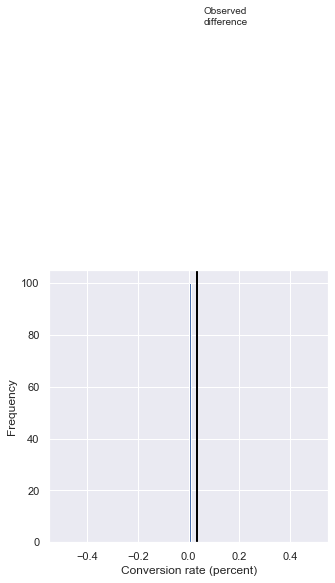

In [78]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=100, rwidth=0.9)
ax.axvline(x=0.03158299999999997, color='black', lw=2)
ax.text(0.06, 200, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Conversion rate (percent)')
ax.set_ylabel('Frequency')

In [79]:
perm_diffs

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]